# PREDICTOR - GASTO MEDIO - Sin añadir datos extra (solo gasto)
# 00

# Proposito:

En este notebook nos dedicaremos a la creación del predictor para gasto medio

In [1]:
%load_ext watermark
%watermark

Last updated: 2023-02-01T11:09:28.570434+00:00

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 126 Stepping 5, GenuineIntel
CPU cores   : 8
Architecture: 64bit



In [2]:
import pandas as pd
import numpy as np
import os
import re

# PREPARACION PREVIA

Primero necesitamos copiar todos nuestros archivos en una carpeta donde podramos manipularlos para así conservar los archivos originales

In [3]:
from distutils.dir_util import copy_tree

# Método que limpia la carpeta de datos volatiles ya que es 
# una carpeta activa en todos los programas que hemos generado.
def limpiaCarpetaVolatil(rutaCopia):
    print("Limpiando Carpeta Volatil...")
    for f in os.listdir(rutaCopia):
        os.remove(os.path.join(rutaCopia, f))
        
#Metodo que copia recursivamente
def copia(dir_origen,dir_destino):
    print("Copiando...")
    copy_tree(dir_origen, dir_destino)
    print("Copiado")
    print(os.listdir(dir_destino))
  


In [4]:
rutaBase= "../PredictorGastoTuristico/DatosGuardados"
rutaCopia= "../PredictorGastoTuristico/DatosVolatiles/"

limpiaCarpetaVolatil(rutaCopia)
copia(rutaBase,rutaCopia)

Limpiando Carpeta Volatil...
Copiando...
Copiado
['filtrogc_paises_gasto.csv', 'filtroPAISES.csv', 'gasto_medio_islas.csv', 'turistas_isla.csv.csv', 'turistas_motivos.csv.csv', 'turistas_motivos_isla.csv.csv', 'turistas_origen.csv.csv', 'turistas_paquete.csv.csv', 'turistas_paquete_isla.csv.csv', 'turistas_sexo_edad.csv.csv']


## Primero cargamos los archivos para tratarlos y finalmente unirlos:

In [5]:
gasto_medio = pd.read_csv(rutaCopia+'gasto_medio_islas.csv',keep_default_na=False, na_values=[""])

In [6]:
gasto_medio.head()

,fecha,pais,isla,total gasto por turista,gasto por turista alojamiento,gasto por turista transporte nacional / internacional,gasto por turista otros
0,2019Q4,TOTAL,Gran Canaria,1254.62,510.15,413.23,331.24
1,2019Q3,TOTAL,Gran Canaria,1239.57,520.76,365.67,353.14
2,2019Q2,TOTAL,Gran Canaria,1124.73,474.48,340.77,309.48
3,2019Q1,TOTAL,Gran Canaria,1059.74,478.40,259.42,321.92
4,2018Q4,TOTAL,Gran Canaria,1205.52,528.63,341.18,335.71


In [7]:
gasto_medio.shape

(1960, 7)

In [8]:
df = pd.get_dummies(gasto_medio, columns=['isla','pais'])
df.head()

,fecha,total gasto por turista,gasto por turista alojamiento,gasto por turista transporte nacional / internacional,gasto por turista otros,isla_CANARIAS,isla_Fuerteventura,isla_Gran Canaria,isla_La Palma,isla_Lanzarote,isla_Tenerife,pais_Alemania,pais_España,pais_Holanda,pais_Otros países,pais_Países Nórdicos,pais_Reino Unido,pais_TOTAL
0,2019Q4,1254.62,510.15,413.23,331.24,0,0,1,0,0,0,0,0,0,0,0,0,1
1,2019Q3,1239.57,520.76,365.67,353.14,0,0,1,0,0,0,0,0,0,0,0,0,1
2,2019Q2,1124.73,474.48,340.77,309.48,0,0,1,0,0,0,0,0,0,0,0,0,1
3,2019Q1,1059.74,478.40,259.42,321.92,0,0,1,0,0,0,0,0,0,0,0,0,1
4,2018Q4,1205.52,528.63,341.18,335.71,0,0,1,0,0,0,0,0,0,0,0,0,1


In [9]:
df.dtypes

fecha                                                     object
total gasto por turista                                  float64
gasto por turista alojamiento                            float64
gasto por turista transporte nacional / internacional    float64
gasto por turista  otros                                 float64
isla_CANARIAS                                              uint8
isla_Fuerteventura                                         uint8
isla_Gran Canaria                                          uint8
isla_La Palma                                              uint8
isla_Lanzarote                                             uint8
isla_Tenerife                                              uint8
pais_Alemania                                              uint8
pais_España                                                uint8
pais_Holanda                                               uint8
pais_Otros países                                          uint8
pais_Países Nórdicos     

In [10]:
gasto_medio = df
gasto_medio.head()

,fecha,total gasto por turista,gasto por turista alojamiento,gasto por turista transporte nacional / internacional,gasto por turista otros,isla_CANARIAS,isla_Fuerteventura,isla_Gran Canaria,isla_La Palma,isla_Lanzarote,isla_Tenerife,pais_Alemania,pais_España,pais_Holanda,pais_Otros países,pais_Países Nórdicos,pais_Reino Unido,pais_TOTAL
0,2019Q4,1254.62,510.15,413.23,331.24,0,0,1,0,0,0,0,0,0,0,0,0,1
1,2019Q3,1239.57,520.76,365.67,353.14,0,0,1,0,0,0,0,0,0,0,0,0,1
2,2019Q2,1124.73,474.48,340.77,309.48,0,0,1,0,0,0,0,0,0,0,0,0,1
3,2019Q1,1059.74,478.40,259.42,321.92,0,0,1,0,0,0,0,0,0,0,0,0,1
4,2018Q4,1205.52,528.63,341.18,335.71,0,0,1,0,0,0,0,0,0,0,0,0,1


**Variables Dummy**

Es necesario recordar que pada evitar la multicolineaidad debemos quitar una columna de las variables dummy que creamos, ya que si las ponemos todas creamos una dependencia circular.

### NOTA:
**Para evitar el sigueiente error:**

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

**Debemos eliminar los valores nulos de las columnas del df**

In [11]:
gasto_medio.isnull().sum()

fecha                                                     0
total gasto por turista                                   5
gasto por turista alojamiento                            10
gasto por turista transporte nacional / internacional     6
gasto por turista  otros                                  4
isla_CANARIAS                                             0
isla_Fuerteventura                                        0
isla_Gran Canaria                                         0
isla_La Palma                                             0
isla_Lanzarote                                            0
isla_Tenerife                                             0
pais_Alemania                                             0
pais_España                                               0
pais_Holanda                                              0
pais_Otros países                                         0
pais_Países Nórdicos                                      0
pais_Reino Unido                        

In [12]:
gasto_medio = gasto_medio.dropna()

# PREDICTOR

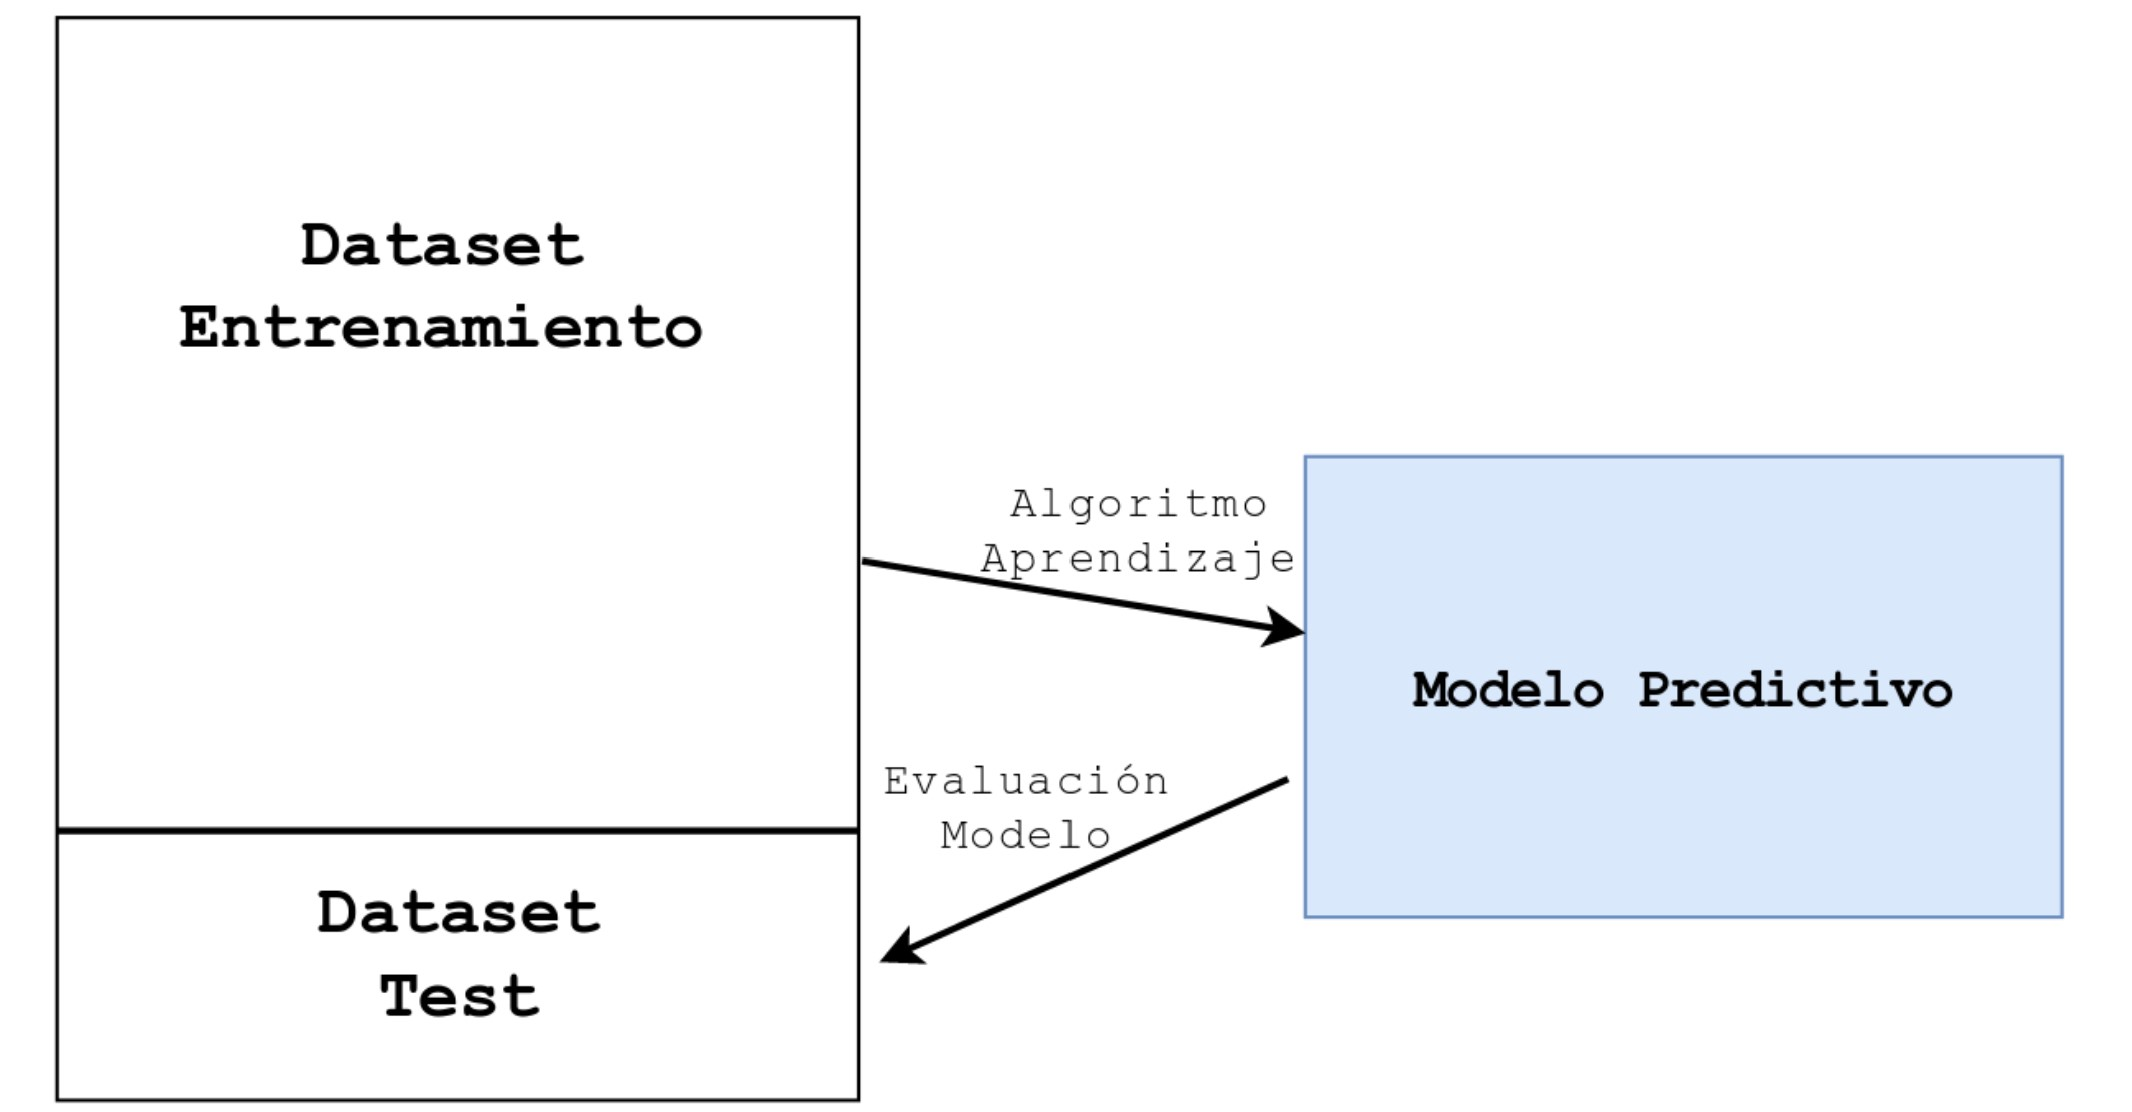

In [3]:
from IPython.display import Image

Image("../PredictorGastoTuristico/OtrosRecursos/Imagenes/img01.jpg")

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [15]:
def rmse(objetivo, estimaciones):
    return np.sqrt(metrics.mean_squared_error(objetivo, estimaciones)
                  )

def adjusted_r2(objetivo, estimaciones, n, k):
    r2 = metrics.r2_score(objetivo, estimaciones)
    return 1 - (1-r2)*(n-1) / (n - k - 1)

def evaluar_modelo(objetivo, estimaciones, n, k):
    return {
        "rmse": rmse(objetivo, estimaciones),
        "mae": metrics.mean_absolute_error(objetivo, estimaciones),
        "adjusted_r2": adjusted_r2(objetivo, estimaciones, n, k)
           }

In [16]:
gasto_medio.columns

Index(['fecha', 'total gasto por turista', 'gasto por turista alojamiento',
       'gasto por turista transporte nacional / internacional',
       'gasto por turista  otros', 'isla_CANARIAS', 'isla_Fuerteventura',
       'isla_Gran Canaria', 'isla_La Palma', 'isla_Lanzarote', 'isla_Tenerife',
       'pais_Alemania', 'pais_España', 'pais_Holanda', 'pais_Otros países',
       'pais_Países Nórdicos', 'pais_Reino Unido', 'pais_TOTAL'],
      dtype='object')

- **quite fechas** ya que la regresion solo acepta variables numéricas
- **quite total gasto por turista** ya que me al final es la suma de todos los gastos asique facilira la predicción... al ser una variable dependiente de otras, aporta demasasida infromación ¿NO?
- **quite isla_CANARIAS** para evitar la multicolinealidad de las **variables dummy**
- **quite isla_Alemania** para evitar la multicolinealidad de las **variables dummy**


In [17]:
nombres_variables_independientes = ['gasto por turista transporte nacional / internacional',
       'gasto por turista  otros', 'isla_Fuerteventura',
       'isla_Gran Canaria', 'isla_La Palma', 'isla_Lanzarote', 'isla_Tenerife',
       'pais_España', 'pais_Holanda', 'pais_Otros países',
       'pais_Países Nórdicos', 'pais_Reino Unido', 'pais_TOTAL']

In [18]:
gasto_medio[nombres_variables_independientes]

,gasto por turista transporte nacional / internacional,gasto por turista otros,isla_Fuerteventura,isla_Gran Canaria,isla_La Palma,isla_Lanzarote,isla_Tenerife,pais_España,pais_Holanda,pais_Otros países,pais_Países Nórdicos,pais_Reino Unido,pais_TOTAL
0,413.23,331.24,0,1,0,0,0,0,0,0,0,0,1
1,365.67,353.14,0,1,0,0,0,0,0,0,0,0,1
2,340.77,309.48,0,1,0,0,0,0,0,0,0,0,1
3,259.42,321.92,0,1,0,0,0,0,0,0,0,0,1
4,341.18,335.71,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1955,293.96,334.04,0,0,0,0,0,0,0,1,0,0,0
1956,270.96,319.17,0,0,0,0,0,0,0,1,0,0,0
1957,327.36,378.06,0,0,0,0,0,0,0,1,0,0,0
1958,279.12,315.00,0,0,0,0,0,0,0,1,0,0,0


In [19]:
nombre_variables_objetivas = ['gasto por turista alojamiento','total gasto por turista'
       'gasto por turista transporte nacional / internacional',
       'gasto por turista  otros']

# AQUÍ DIVIDIMOS EL DATASET EN TRAIN Y TEST

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
train_test_split?

In [22]:
gasto_medio[nombres_variables_independientes].shape

(1950, 13)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
     gasto_medio[nombres_variables_independientes], gasto_medio[nombre_variables_objetivas[0]],
     test_size=0.33, random_state=13
)

Vemos el "random_state=13" que es la semilla

In [24]:
print(X_train.shape, y_train.shape)

(1306, 13) (1306,)


In [25]:
print(X_test.shape, y_test.shape)

(644, 13) (644,)


In [26]:
#modelo_ols = LinearRegression()
#modelo_ols.fit(X=X_train, y=y_train)

In [27]:
#y_pred = modelo_ols.predict(X_test)

In [28]:
#print(y_pred)

In [29]:
#print(y_test)

# AQUÍ AJUSTAMOS EL MODELO DE REGRESION LINEAL MÚLTIPLE

Ademas, evaluamos el modelo de entrenamiento y test

In [30]:
RESULTADOS = {}

modelo_ols = LinearRegression()
modelo_ols.fit(X=X_train, y=y_train)
modelo_ols_train_preds = modelo_ols.predict(X_train)
modelo_ols_test_preds = modelo_ols.predict(X_test)


RESULTADOS["ols_train"] = evaluar_modelo(
    y_train,
    modelo_ols_train_preds,
    X_train.shape[0],
    len(modelo_ols.coef_)
)

RESULTADOS["ols_test"] = evaluar_modelo(
    y_test,
    modelo_ols_test_preds,
    X_test.shape[0],
    len(modelo_ols.coef_)
)

pd.DataFrame(RESULTADOS)

,ols_train,ols_test
rmse,53.693570,54.488614
mae,33.745649,35.328235
adjusted_r2,0.675862,0.643480


Para ver la magnitud del error en el que estamos cayendo al hacer una sola separación entre test y entrenamiento, vamos a probar un monton de semillas y ver cual es el rango del error que se puede obtener 

In [31]:
model=LinearRegression()
results = []

def test_seed(seed):
    
    X_train, X_test, y_train, y_test = train_test_split(
     gasto_medio[nombres_variables_independientes], gasto_medio[nombre_variables_objetivas[0]],
     test_size=0.33, random_state=seed
    )
    test_preds = model.fit(X_train, y_train).predict(X_test)
    seed_rmse = rmse(y_test, test_preds)
    results.append([seed_rmse, seed])

In [32]:
for i in range(1000):
    test_seed(i)

In [33]:
results[:5]

[[52.60930636971828, 0],
 [53.03561901151996, 1],
 [51.20269671058771, 2],
 [55.736712130676864, 3],
 [51.68294727059393, 4]]

In [34]:
results_sorted = sorted(results, key=lambda x: x[0], reverse=False)

In [35]:
# Visualizamos el error mas pequeño
results_sorted[0]

[45.2505808585555, 593]

In [36]:
# Visualizamos el error mas grande
results_sorted[-1]

[64.42185838229435, 139]

# Validación Cruzada (Cross Validation)

Vemos que entre la semilla con menor error de test y la semilla con mayor error hay una diferencia, en este caso no es mucho, pero en otros casso podria ser bastante significativo.

https://es.wikipedia.org/wiki/Validaci%C3%B3n_cruzada


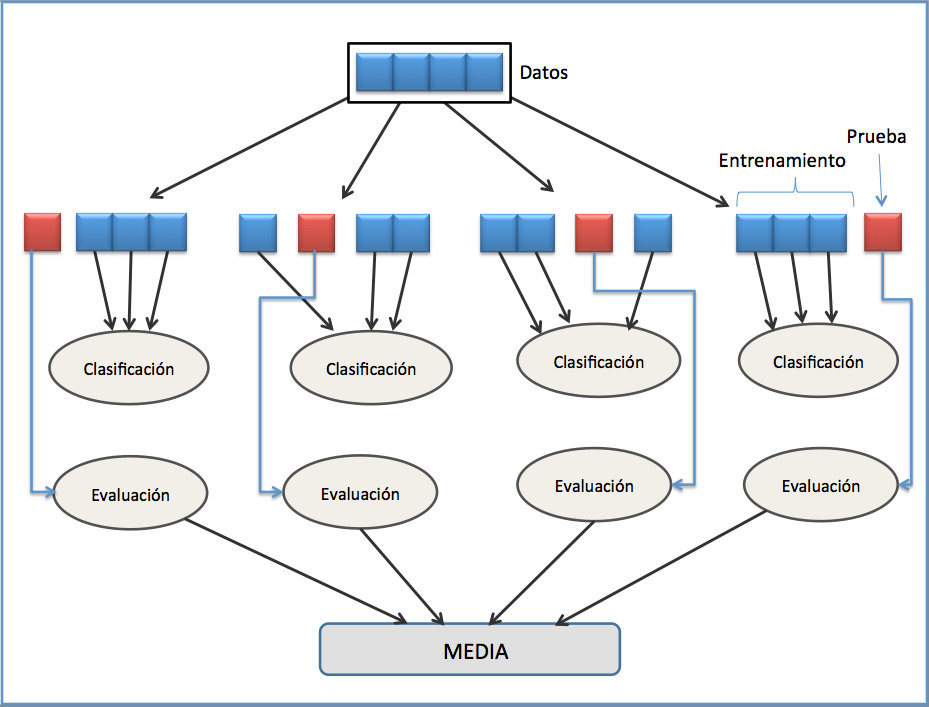

In [4]:
Image("../PredictorGastoTuristico/OtrosRecursos/Imagenes/img_02.jpg")

Una forma de evitar el cometer este error es mediante la **Validación cruzada**

![cross_val](https://cdn-images-1.medium.com/max/1600/1*J2B_bcbd1-s1kpWOu_FZrg.png)

In [37]:
from sklearn.model_selection import cross_val_score

In [38]:
cross_val_score?

In [39]:
modelo_ols = LinearRegression()
X = gasto_medio[nombres_variables_independientes]
y = gasto_medio[nombre_variables_objetivas[0]]

resultados_validación_cruzada = cross_val_score(
    estimator=modelo_ols, 
    X=X,
    y=y,
    scoring="neg_mean_squared_error", 
    cv=10
)

In [40]:
resultados_validación_cruzada

array([-4157.08685481, -3378.07450185, -4774.55211849, -4501.93402052,
       -6009.98288226, -4343.05151453, -1103.9229607 , -1881.29922597,
       -1045.73810607, -1409.48270807])

In [41]:
resultados_validación_cruzada.mean()

-3260.5124893268335

In [42]:
def rmse_cross_val(estimator, X, y):
    y_pred = estimator.predict(X)
    return np.sqrt(metrics.mean_squared_error(y, y_pred))

In [43]:
resultados_cv = []
for i in range(10,200):
    cv_rmse = cross_val_score(
        estimator=modelo_ols, 
        X=X,
        y=y,
        scoring=rmse_cross_val, 
        cv=i
    ).mean()
    resultados_cv.append(cv_rmse)

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt

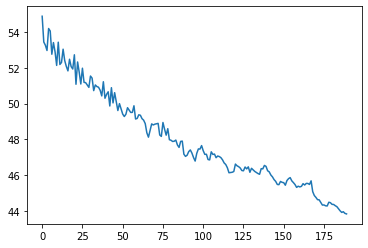

In [45]:
plt.plot(resultados_cv)

In [46]:
from sklearn.model_selection import cross_validate
scoring = {"mae": "neg_mean_absolute_error", "rmse": rmse_cross_val}
estimator = modelo_ols
scores = cross_validate(estimator, gasto_medio[nombres_variables_independientes],
                        gasto_medio[nombre_variables_objetivas[0]], scoring=scoring,
                         cv=100, return_train_score=True)

In [47]:
pd.DataFrame(scores).mean()

fit_time       0.005361
score_time     0.005399
test_mae     -36.401225
train_mae    -34.786419
test_rmse     47.118942
train_rmse    53.830936
dtype: float64

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets

X = gasto_medio[nombres_variables_independientes]
y = gasto_medio[nombre_variables_objetivas[0]]
#
# Create a training and test split
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#
# Fit a pipeline using Training dataset and related labels
# Use Ridge algorithm for training the model
#
pipeline = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
pipeline.fit(X_train, y_train)
#
# Calculate the predicted value for training and test dataset
#
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)
#
# Mean Squared Error
#
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),
                mean_squared_error(y_test, y_test_pred)))
#
# R-Squared
#
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

MSE train: 2984.214, test: 2739.811
R^2 train: 0.678, test: 0.650
